# **Discovering Exoplanets**
To hunt exoplanets in Deep Space using Machine Learning and Deep Learning approaches.

## **Step 1: Installing Python Libraries**

In [35]:
#Python Library for animated charts
!pip install ipyvizzu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Step 2: Importing Necessary Libraries**

In [1]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import sklearn.svm as svm
from sklearn.svm import SVC
from scipy.fftpack import fft
# from google.colab import drive
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from keras.models import Sequential
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
from keras.utils.vis_utils import plot_model
from ipyvizzu import Chart, Data, Config, Style
from sklearn.model_selection import GridSearchCV
from scipy.ndimage.filters import gaussian_filter
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, MaxPooling1D, Convolution1D, BatchNormalization, Flatten
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,plot_confusion_matrix, roc_curve, precision_recall_curve, roc_auc_score

/opt/homebrew/Caskroom/miniforge/base/envs/env_tf/lib/python3.9/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.12.2 when it was built against 1.12.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
/var/folders/3k/gk_kmh6j56g34030nzl9_5nc0000gn/T/ipykernel_38193/2038120932.py:20: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


## **Step 3: Load Train and Test Data**
Dataset Source: Kaggle Exoplanet Hunting in Deep Space

https://www.kaggle.com/datasets/keplersmachines/kepler-labelled-time-series-data

In [2]:
train_df = pd.read_csv('data/exoTrain.csv')
test_df = pd.read_csv('data/exoTest.csv')

In [3]:
train_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


## **Step 4: Exploratory Data Analysis and Data Pre-processing**


### **Check for missing values in the dataset**

In [4]:
print("Shape of the train dataset before removing null values:", train_df.shape)
train_df.dropna(inplace=True)
print("Shape of the train dataset after removing null values, if any:", train_df.shape)

Shape of the train dataset before removing null values: (5087, 3198)
Shape of the train dataset after removing null values, if any: (5087, 3198)


### **Check for duplicate values in the dataset**

In [5]:
print("Shape of the train dataset before removing duplicate values:", train_df.shape)
train_df.drop_duplicates(inplace=True)
print("Shape of the train dataset after removing duplicate values, if any:", train_df.shape)

Shape of the train dataset before removing duplicate values: (5087, 3198)
Shape of the train dataset after removing duplicate values, if any: (5087, 3198)


**Inference:** Dataset doesn't have any missing values or duplicates

### **Descriptive Statistics of Data**

In [6]:
train_df.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,1.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,1.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,1.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,1.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,1.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,2.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


**Inference:** 

Shows the total size of the dataset and shows that we have a lot of Exoplanet Star vs Non-Exoplanets in the dataset since the mean is much closer to 1 instead of 2.

### **Splitting Data into X, Y for Data Preprocessing**

In [7]:
# Fetching X_train, y_train, X_test and y_test from train_df and test_df. Target column: LABEL
X_train = train_df.drop(['LABEL'], axis=1) 
y_train = train_df['LABEL']
X_test = test_df.drop(['LABEL'], axis=1)
y_test = test_df['LABEL']
print("X_Train:", X_train.shape, " Y_Train:", y_train.shape)
print("X_Test: ", X_test.shape, "  Y_test:", y_test.shape)

X_Train: (5087, 3197)  Y_Train: (5087,)
X_Test:  (570, 3197)   Y_test: (570,)


### **Flux Analysis**

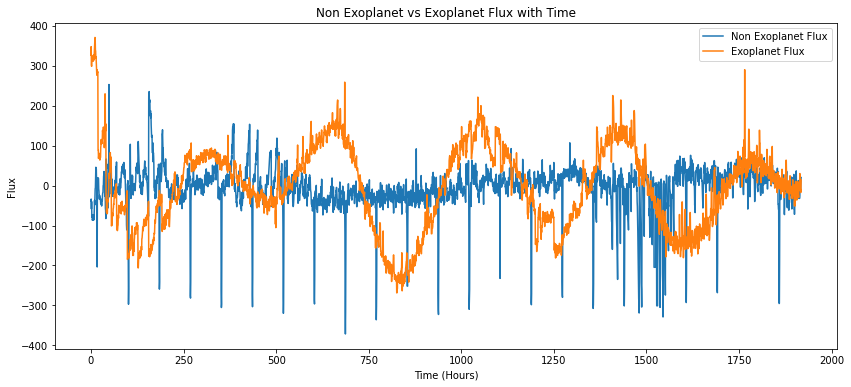

In [8]:
non_exoplanet_index = 1 
exoplanet_index = 3

#Fetching exoplanet and non_exoplanet flux from X_train and converting Barycentric Time to Earth Time. 
non_exoplanet_flux = X_train.iloc[non_exoplanet_index]
exoplanet_flux = X_train.iloc[exoplanet_index]
time = np.arange(len(non_exoplanet_flux)) * ((36.0)/(60.0))

#Plotting Exoplanet vs Non-Exoplanet Flux
plt.figure(figsize=[14,6])
plt.plot(time, non_exoplanet_flux, label = "Non Exoplanet Flux")
plt.plot(time, exoplanet_flux, label = "Exoplanet Flux")
plt.title("Non Exoplanet vs Exoplanet Flux with Time")
plt.xlabel("Time (Hours)")
plt.ylabel("Flux")
plt.legend(loc="upper right")

### **Data Normalization**
To change the values of flux to a common scale [0,1], without distorting differences in the ranges of values

In [9]:
X_train = normalize(X_train)
X_test = normalize(X_test)
print(X_train.shape)
print(X_test.shape)

(5087, 3197)
(570, 3197)


To one hot encode the target variables Exoplanet Star (1) and Non-Exoplanet Star (0). 

Currently an Exoplanet Star has a label 2 and a Non-Exoplanet Star has a label 1.

In [10]:
y_train = y_train-1 
y_test = y_test-1

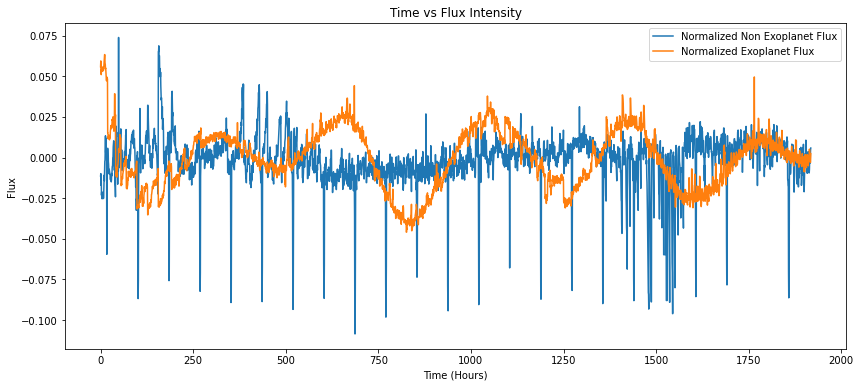

In [11]:
#Fetching exoplanet and non_exoplanet flux from X_train_normalized and converting Barycentric Time to Earth Time. 
normalized_non_exoplanet_flux = X_train[non_exoplanet_index,:]
normalized_exoplanet_flux = X_train[exoplanet_index,:]
time = np.arange(len(normalized_exoplanet_flux)) * ((36.0)/(60.0))

#Plotting Exoplanet vs Non-Exoplanet Flux
plt.figure(figsize=[14,6])
plt.plot(time, normalized_non_exoplanet_flux, label = "Normalized Non Exoplanet Flux")
plt.plot(time, normalized_exoplanet_flux, label = "Normalized Exoplanet Flux")
plt.title("Time vs Flux Intensity")
plt.xlabel("Time (Hours)")
plt.ylabel("Flux")
plt.legend(loc="upper right")

### **Fast Fourier Transform**
Using FFT, we decompose time dependent functions into frequency dependent functions.

In [12]:
X_train_fft = np.abs(fft(X_train, n=len(X_train[0]), axis=1))
X_test_fft = np.abs(fft(X_test, n=len(X_test[0]), axis=1))
print(X_train_fft.shape)
print(X_test_fft.shape)

(5087, 3197)
(570, 3197)


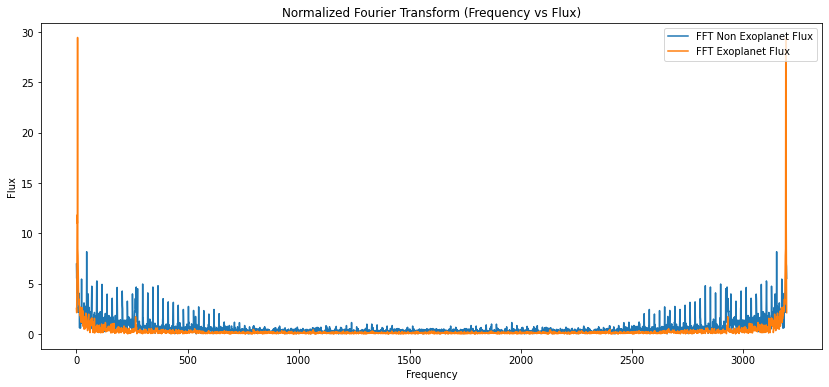

In [13]:
#Fetching non_exoplanet and exoplanet flux from X_train_fft and plotting with frequency
fft_non_exoplanet_flux = X_train_fft[non_exoplanet_index,:]
fft_exoplanet_flux = X_train_fft[exoplanet_index,:]
frequency = np.arange(len(X_train_fft[0])) 

#Plotting Non-Exoplanet Flux vs Exoplanet
plt.figure(figsize=[14,6])
plt.title("Normalized Fourier Transform (Frequency vs Flux)")
plt.xlabel("Frequency")
plt.ylabel("Flux")
plt.plot(frequency, fft_non_exoplanet_flux, label = "FFT Non Exoplanet Flux")
plt.plot(frequency, fft_exoplanet_flux, label = "FFT Exoplanet Flux")
plt.legend(loc="upper right")

**Inference:** FFT helps extracting seasonality patterns that outputs one value of amplitude for each frequency. We know that high flux density corresponds to higher the importance of seasonality. Hence, from the above plot we can conclude that exoplanet shows stronger seasonlity as compared to non-exoplanet flux. This oservation forms the the basis of our classification model


### **Gaussian Filtering**
Smoothing messy signal by applying a Gaussian filter to the observations and reduce noise.


In [14]:
# apply the gaussian filter to all rows data
sigma = 7.0
X_train_fft = np.apply_along_axis(gaussian_filter,axis=1,arr=X_train_fft,sigma=sigma)
X_test_fft = np.apply_along_axis(gaussian_filter,axis=1,arr=X_test_fft,sigma=sigma)
print(X_train_fft.shape)
print(X_test_fft.shape)

(5087, 3197)
(570, 3197)


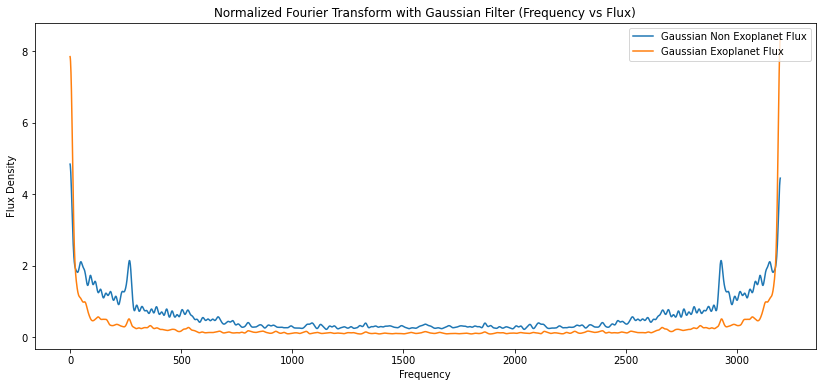

In [15]:
#Fetching non_exoplanet and exoplanet flux from X_train_gaussian and plotting with frequency
gaussian_non_eoplanet_flux = X_train_fft[non_exoplanet_index,:]
gaussian_exoplanet_flux = X_train_fft[exoplanet_index,:]
frequency = np.arange(len(X_train_fft[0]))

#Plotting Non-Exoplanet Flux vs Exoplanet
plt.figure(figsize=[14,6])
plt.plot(frequency, gaussian_non_eoplanet_flux, label = "Gaussian Non Exoplanet Flux")
plt.plot(frequency, gaussian_exoplanet_flux, label = "Gaussian Exoplanet Flux")
plt.title("Normalized Fourier Transform with Gaussian Filter (Frequency vs Flux)")
plt.xlabel("Frequency")
plt.ylabel("Flux Density")
plt.legend(loc="upper right")

### **Target Variable Analysis**

In [16]:
train_df['LABEL'].value_counts()

1    5050
2      37
Name: LABEL, dtype: int64

**Inference:** We notice that there is high imbalance in the training data. Hence, oversampling data might help in better model performance.

### **Upsampling using SMOTE**

Since there are very few confirmed exoplanet stars having an imbalanced dataset is expected.

Hence we implement up-sampling techniques to balance the dataset.

In [17]:
def smote(x_train, y_train, over_sampling_strategy):
    oversampling = SMOTE(sampling_strategy = over_sampling_strategy)
    steps = [('o', oversampling)]
    pipeline = Pipeline(steps=steps)
    x_train_resample, y_train_resample = pipeline.fit_resample(x_train, y_train)
    return x_train_resample,y_train_resample

In [18]:
X_train_fft, y_train_fft = smote(X_train_fft,y_train,0.3)
print ("Number of Exoplanet Stars in Train Set is "+str(len(y_train_fft[y_train_fft==1])))
print ("Number of non-Exoplanet Stars in Train Set is "+str(len(y_train_fft[y_train_fft==0])))

Number of Exoplanet Stars in Train Set is 1515
Number of non-Exoplanet Stars in Train Set is 5050


### Animated chart visualization for Class Imbalance

Below is an animation of how the count of the target variable (Exoplanet Star or Non-Exoplanet Star) changes before and after Oversampling.

In [19]:
## Added animated chart code.
label_counts = pd.DataFrame(y_train)
label_counts["Count"] = 1
label_counts.loc[label_counts["LABEL"]  == 0,["LABEL"]] = "Non-Exoplanet"
label_counts.loc[label_counts["LABEL"]  == 1,["LABEL"]] = "Exoplanet"
data = Data()
data.add_data_frame(label_counts)
chart = Chart(width="640px", height="360px",display="manual")
chart.animate(data)
chart.animate(
    Style({"plot": {"marker": {"colorPalette": "#00A36C #D21F3C"}}})
)
chart.animate(Config({"channels": {
                "x": {"range": {"min": 0,"max": 1,}},"y": {"range": {"max": "1%"}},
            }}))
chart.animate(Config({"y": "Count","x": "LABEL","color":"LABEL"}))
chart.animate(Config({"channels":{"x": {"range": {"min": "auto","max": "auto"}},"y": {"range": {"max": "auto"}}}}))
label_counts = pd.DataFrame(y_train_fft)
label_counts["Count"] = 1
label_counts.loc[label_counts["LABEL"]  == 0,["LABEL"]] = "Non-Exoplanet"
label_counts.loc[label_counts["LABEL"]  == 1,["LABEL"]] = "Exoplanet"
data.add_data_frame(label_counts)
chart.animate(data)
chart.animate(Config({"channels":{"x": {"range": {"min": "auto","max": "auto"}},"y": {"range": {"max": "auto"}}}}))
chart.show()

## **Step 4:** Modelling

### **Approach 1:** SVM

In [20]:
# function that builds the SVM model using grid search
def svm_model(X_train, y_train,X_test):
    tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000],'probability': [True]},{'kernel': ['linear'], 'C': [1, 10, 100, 1000],'probability': [True]}] 
    clf = GridSearchCV( SVC(), param_grid = tuned_parameters,scoring = 'recall')
    # optimized parameters that were found using grid search
    # SVC = svm.SVC(kernel='rbf', C=1, gamma=0.001,probability=True)
    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)
    y_pred_class = clf.predict(X_test)
    return y_pred,y_pred_class

### **Training and Testing SVM Model**

In [26]:
y_pred_svm,y_pred_class_svm = svm_model(X_train_fft,y_train_fft,X_test_fft)

### **Approach 2:** CNN

In [28]:
def cnn_model(X_train, y_train,X_test):
    def CNNModel(len_seq):
        sequential_model = Sequential()
        sequential_model.add(Convolution1D(filters=256, kernel_size=8, activation="relu", input_shape=(len_seq,1)))
        sequential_model.add(MaxPooling1D(strides=5))
        sequential_model.add(BatchNormalization())
        sequential_model.add(Convolution1D(filters=340, kernel_size=6, activation="relu"))
        sequential_model.add(MaxPooling1D(strides=5))
        sequential_model.add(BatchNormalization())
        sequential_model.add(Convolution1D(filters=256, kernel_size=5, activation="relu"))
        sequential_model.add(MaxPooling1D(strides=5))
        sequential_model.add(BatchNormalization())
        #2.Flattening
        sequential_model.add(Flatten())
        #3.Full Connection
        sequential_model.add(Dropout(0.3))
        sequential_model.add(Dense(24, activation='relu'))
        sequential_model.add(Dropout(0.3))
        sequential_model.add(Dense(12, activation='relu'))
        sequential_model.add(Dense(8, activation='relu'))
        sequential_model.add(Dense(1, activation='sigmoid'))
        sequential_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
        return sequential_model
    len_seq = len(X_train[0])
    classifier = CNNModel(len_seq)
    classifier.fit(X_train,y_train , epochs=15, batch_size = 10, validation_data=(X_test,y_test))
    y_pred = classifier.predict(X_test)
    y_pred_class = (y_pred > 0.5)
    return y_pred,y_pred_class


### **Training and Testing CNN Model**

In [29]:
y_pred_cnn,y_pred_class_cnn = cnn_model(X_train_fft,y_train_fft,X_test_fft)

2022-12-12 22:26:19.485903: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-12 22:26:19.487551: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Epoch 1/15


2022-12-12 22:26:20.060307: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-12 22:26:20.919483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


657/657 [==============================] - ETA: 0s - loss: 0.2736 - accuracy: 0.8899

2022-12-12 22:26:49.382385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


657/657 [==============================] - 30s 44ms/step - loss: 0.2736 - accuracy: 0.8899 - val_loss: 0.0297 - val_accuracy: 0.9877
Epoch 2/15
657/657 [==============================] - 28s 42ms/step - loss: 0.1372 - accuracy: 0.9773 - val_loss: 0.0412 - val_accuracy: 0.9842
Epoch 3/15
657/657 [==============================] - 27s 41ms/step - loss: 0.1082 - accuracy: 0.9825 - val_loss: 0.0276 - val_accuracy: 0.9895
Epoch 4/15
657/657 [==============================] - 29s 44ms/step - loss: 0.0762 - accuracy: 0.9895 - val_loss: 0.0299 - val_accuracy: 0.9930
Epoch 5/15
657/657 [==============================] - 27s 40ms/step - loss: 0.0596 - accuracy: 0.9909 - val_loss: 0.0168 - val_accuracy: 0.9912
Epoch 6/15
657/657 [==============================] - 27s 41ms/step - loss: 0.0450 - accuracy: 0.9927 - val_loss: 0.0217 - val_accuracy: 0.9947
Epoch 7/15
657/657 [==============================] - 27s 40ms/step - loss: 0.0385 - accuracy: 0.9944 - val_loss: 0.0187 - val_accuracy: 0.9930
Epo

2022-12-12 22:33:12.165548: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


## **Step 5:** Evaluation Metrics with FFT

Plotting the classification evaluation metrics such as precision, recall, auc-roc score instead of accuracy because of the skewness in the data set making these metrics more relevant.

In [30]:
def evaluate_model_svm(y_test,y_pred,y_pred_class):
    fpr, tpr, _ = roc_curve(y_test, y_pred[:,1])
    auc = roc_auc_score(y_test, y_pred[:,1])
    plt.plot([0, 1], [0, 1], linestyle='--', label='Baseline')
    plt.plot(fpr, tpr, marker='.', label='SVC (AUC = %0.3f)' % auc)
    plt.title('ROC Curve for SVC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    precision, recall, _ = precision_recall_curve(y_test, y_pred[:,1])
    plt.plot(recall, precision, marker='.', label='SVC')
    plt.title('Precision-Recall Curve for SVC')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_class)
    conf_hm = sns.heatmap(conf_matrix, annot=True, cmap='Blues',fmt='.0f')
    conf_hm.set_xlabel('Predicted')
    conf_hm.set_ylabel('Actual')
    conf_hm.set_title('SVC Confusion Matrix')
    plt.show()
    print(classification_report(y_test, y_pred_class, target_names=["Non Exoplanet","Exoplanet"]))

In [31]:
def evaluate_model_cnn(y_test,y_pred,y_pred_class):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.plot([0, 1], [0, 1], linestyle='--', label='Baseline')
    plt.plot(fpr, tpr, marker='.', label='CNN (AUC = %0.3f)' % auc)
    plt.title('ROC Curve for CNN')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    plt.plot(recall, precision, marker='.', label='CNN')
    plt.title('Precision-Recall Curve for CNN')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_class)
    conf_hm = sns.heatmap(conf_matrix, annot=True, cmap='Blues',fmt='.0f')
    conf_hm.set_xlabel('Predicted')
    conf_hm.set_ylabel('Actual')
    conf_hm.set_title('CNN Confusion Matrix')
    plt.show()
    print(classification_report(y_test, y_pred_class, target_names=["Non Exoplanet","Exoplanet"]))

### **Evaluating SVM model with FFT**

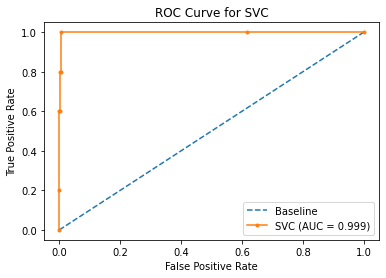

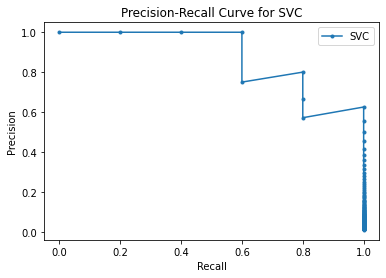

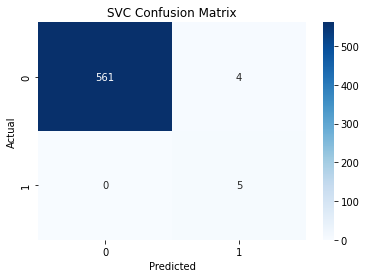

               precision    recall  f1-score   support

Non Exoplanet       1.00      0.99      1.00       565
    Exoplanet       0.56      1.00      0.71         5

     accuracy                           0.99       570
    macro avg       0.78      1.00      0.86       570
 weighted avg       1.00      0.99      0.99       570



In [32]:
evaluate_model_svm(y_test,y_pred_svm,y_pred_class_svm)

### **Evaluating CNN model with FFT**

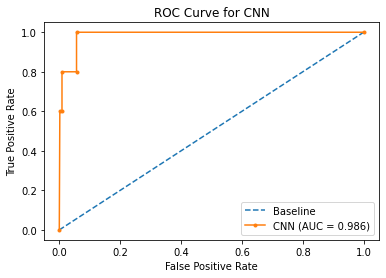

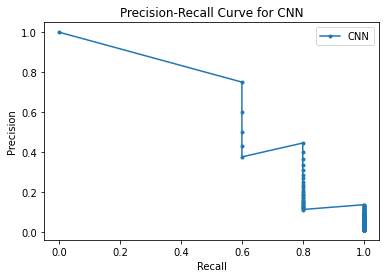

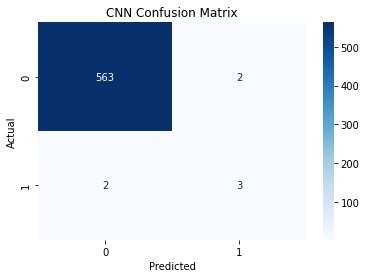

               precision    recall  f1-score   support

Non Exoplanet       1.00      1.00      1.00       565
    Exoplanet       0.60      0.60      0.60         5

     accuracy                           0.99       570
    macro avg       0.80      0.80      0.80       570
 weighted avg       0.99      0.99      0.99       570



In [34]:
evaluate_model_cnn(y_test,y_pred_cnn,y_pred_class_cnn)

## **Step 6:** Evaluation Metrics without FFT

In [35]:
# apply the gaussian filter to all rows data
sigma = 7.0
X_train_without_fft = np.apply_along_axis(gaussian_filter,axis=1,arr=X_train,sigma=sigma)
X_test_without_fft = np.apply_along_axis(gaussian_filter,axis=1,arr=X_test,sigma=sigma)
print(X_train_without_fft.shape)
print(X_train_without_fft.shape)
X_train_without_fft, y_train_without_fft = smote(X_train_without_fft,y_train,0.3)
print ("Number of Exoplanet Stars in Train Set is "+str(len(y_train_without_fft[y_train_without_fft==1])))
print ("Number of non-Exoplanet Stars in Train Set is "+str(len(y_train_without_fft[y_train_without_fft==0])))

(5087, 3197)
(5087, 3197)
Number of Exoplanet Stars in Train Set is 1515
Number of non-Exoplanet Stars in Train Set is 5050


In [36]:
y_pred_svm_without,y_pred_class_svm_without = svm_model(X_train_without_fft,y_train_without_fft,X_test_fft)

In [37]:
y_pred_cnn_without,y_pred_class_cnn_without = cnn_model(X_train_without_fft,y_train_without_fft,X_test_fft)

Epoch 1/15


2022-12-12 22:47:24.182528: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


657/657 [==============================] - ETA: 0s - loss: 0.2590 - accuracy: 0.9071

2022-12-12 22:47:55.388426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


657/657 [==============================] - 34s 48ms/step - loss: 0.2590 - accuracy: 0.9071 - val_loss: 5.5162 - val_accuracy: 0.9912
Epoch 2/15
657/657 [==============================] - 30s 45ms/step - loss: 0.1395 - accuracy: 0.9735 - val_loss: 13.9012 - val_accuracy: 0.9912
Epoch 3/15
657/657 [==============================] - 30s 45ms/step - loss: 0.1024 - accuracy: 0.9825 - val_loss: 2.3248 - val_accuracy: 0.9860
Epoch 4/15
657/657 [==============================] - 29s 44ms/step - loss: 0.0780 - accuracy: 0.9858 - val_loss: 12.8269 - val_accuracy: 0.9895
Epoch 5/15
657/657 [==============================] - 30s 46ms/step - loss: 0.0659 - accuracy: 0.9874 - val_loss: 15.3746 - val_accuracy: 0.9912
Epoch 6/15
657/657 [==============================] - 29s 45ms/step - loss: 0.0547 - accuracy: 0.9896 - val_loss: 18.6810 - val_accuracy: 0.9912
Epoch 7/15
657/657 [==============================] - 31s 47ms/step - loss: 0.0425 - accuracy: 0.9928 - val_loss: 17.9566 - val_accuracy: 0.991

2022-12-12 22:54:43.029974: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


### **Evaluating SVM model without FFT**

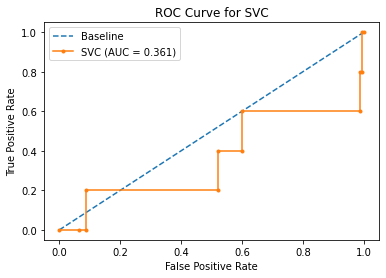

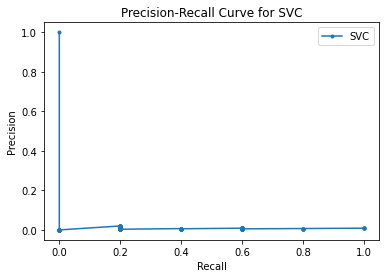

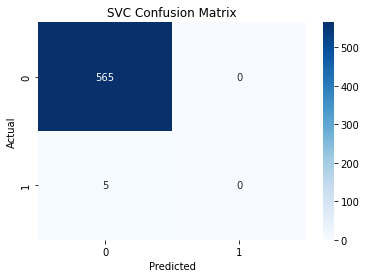

               precision    recall  f1-score   support

Non Exoplanet       0.99      1.00      1.00       565
    Exoplanet       0.00      0.00      0.00         5

     accuracy                           0.99       570
    macro avg       0.50      0.50      0.50       570
 weighted avg       0.98      0.99      0.99       570



/opt/homebrew/Caskroom/miniforge/base/envs/env_tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/env_tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/env_tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [38]:
evaluate_model_svm(y_test,y_pred_svm_without,y_pred_class_svm_without)

### **Evaluating CNN model without FFT**

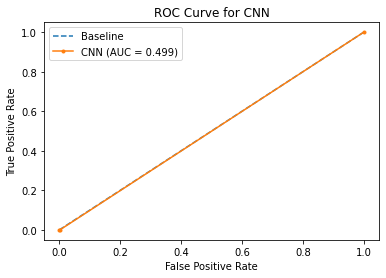

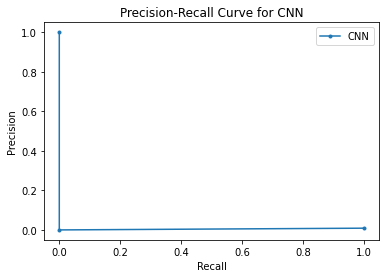

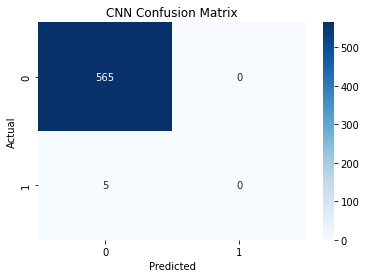

               precision    recall  f1-score   support

Non Exoplanet       0.99      1.00      1.00       565
    Exoplanet       0.00      0.00      0.00         5

     accuracy                           0.99       570
    macro avg       0.50      0.50      0.50       570
 weighted avg       0.98      0.99      0.99       570



/opt/homebrew/Caskroom/miniforge/base/envs/env_tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/env_tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/env_tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [39]:
evaluate_model_cnn(y_test,y_pred_cnn_without,y_pred_class_cnn_without)

## **Step 7:** Conclusion

1. Through these experiments we were able to successfully classify exoplanet stars and non-exoplanet stars using the SVC and CNN model.

2. The second experiment without FFT as a preprocessing step shows that the model performs much worse this shows the importance of data preprocessing in Machine learning problems.